In [1]:
import pandas as pd

In [2]:
experiment = "without_B_cells"

csx_fractions = pd.read_csv(
    f"gs://liulab/csx_experiments_excluding_cell_types/{experiment}/out/CIBERSORTx_Results.txt",
    sep="\t",
    index_col=0
)
csx_fractions = csx_fractions.iloc[:, :-3]  # exclude last three columns, which are statistics
csx_fractions.rename_axis("cell_type", axis="columns", inplace=True)
csx_fractions

cell_type,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4
Mixture,,,,,,,
sim.tumor.1,0.735415,0.011654,0.040765,0.017429,0.028057,0.040506,0.126173
sim.tumor.2,0.922256,0.000000,0.002761,0.004820,0.007495,0.017494,0.045175
sim.tumor.3,0.312699,0.060622,0.126481,0.047298,0.036183,0.082824,0.333891
sim.tumor.4,0.095793,0.034800,0.249915,0.057083,0.067985,0.120623,0.373801
sim.tumor.5,0.242514,0.065514,0.256178,0.000000,0.061755,0.053472,0.320568
...,...,...,...,...,...,...,...
sim.tumor.96,0.669433,0.047404,0.000000,0.026998,0.075408,0.031331,0.149426
sim.tumor.97,0.466948,0.053724,0.071899,0.002252,0.057108,0.069745,0.278324
sim.tumor.98,0.037619,0.000000,0.226277,0.148991,0.049016,0.129469,0.408628


In [3]:
truth = pd.read_csv(
    "gs://liulab/derek/simulations/experiments/generate_cohorts_for_emma/ctp_sim_0.5sd.txt",
    sep="\t",
    index_col=0
)
truth.columns = list(csx_fractions.columns) + ["B cells"]
truth.index = csx_fractions.index
truth.rename_axis("cell_type", axis="columns", inplace=True)
truth

cell_type,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells
Mixture,,,,,,,,
sim.tumor.1,0.725,0.030567,0.053134,0.014234,0.019605,0.025273,0.085953,0.046233
sim.tumor.2,0.207,0.088145,0.153220,0.041046,0.056533,0.072878,0.247859,0.133320
sim.tumor.3,0.566,0.048241,0.083856,0.022464,0.030940,0.039885,0.135650,0.072964
sim.tumor.4,0.841,0.017673,0.030721,0.008230,0.011335,0.014612,0.049697,0.026731
sim.tumor.5,0.683,0.035236,0.061250,0.016408,0.022599,0.029133,0.099081,0.053294
...,...,...,...,...,...,...,...,...
sim.tumor.96,0.596,0.044906,0.078059,0.020911,0.028801,0.037128,0.126273,0.067921
sim.tumor.97,0.408,0.065803,0.114384,0.030642,0.042204,0.054406,0.185034,0.099528
sim.tumor.98,0.246,0.083810,0.145685,0.039027,0.053753,0.069294,0.235669,0.126763


In [4]:
import plotly.io
plotly.io.renderers.default = "jupyterlab+png"

import plotly.express as px


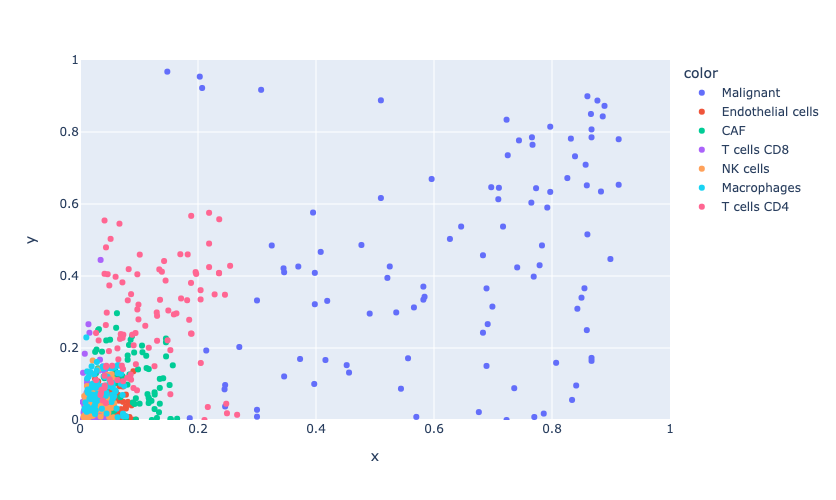

In [5]:
fig = px.scatter(
    x=truth.drop(columns="B cells").stack().values,
    y=csx_fractions.stack().values,
    color=csx_fractions.stack().reset_index()["cell_type"]
)
fig.update_layout(
    width = 600,
    height = 500,
)
fig.update_xaxes(
    range=(0, 1)
)
fig.update_yaxes(
    range=(0, 1),
)


In [13]:
both = csx_fractions.stack().to_frame(name="csx without b cells")
both["truth"] = truth.drop(columns="B cells").stack().values
both

csx without b cells     truth
Mixture       cell_type                                       
sim.tumor.1   Malignant                     0.735415  0.725000
              Endothelial cells             0.011654  0.030567
              CAF                           0.040765  0.053134
              T cells CD8                   0.017429  0.014234
              NK cells                      0.028057  0.019605
...                                              ...       ...
sim.tumor.100 CAF                           0.179233  0.080764
              T cells CD8                   0.053779  0.021636
              NK cells                      0.069515  0.029799
              Macrophages                   0.058202  0.038415
              T cells CD4                   0.220071  0.130649

[700 rows x 2 columns]

In [14]:
both.groupby('cell_type').corr()

csx without b cells     truth
cell_type                                                           
Malignant         csx without b cells             1.000000  0.273819
                  truth                           0.273819  1.000000
Endothelial cells csx without b cells             1.000000  0.273232
                  truth                           0.273232  1.000000
CAF               csx without b cells             1.000000  0.080329
                  truth                           0.080329  1.000000
T cells CD8       csx without b cells             1.000000  0.171481
                  truth                           0.171481  1.000000
NK cells          csx without b cells             1.000000  0.156782
                  truth                           0.156782  1.000000
Macrophages       csx without b cells             1.000000  0.187807
                  truth                           0.187807  1.000000
T cells CD4       csx without b cells             1.000000  0.254133
                  truth                           0.254133  1.000000

In [15]:
both.groupby('cell_type').corr().iloc[0::2, -1]

cell_type                             
Malignant          csx without b cells    0.273819
Endothelial cells  csx without b cells    0.273232
CAF                csx without b cells    0.080329
T cells CD8        csx without b cells    0.171481
NK cells           csx without b cells    0.156782
Macrophages        csx without b cells    0.187807
T cells CD4        csx without b cells    0.254133
Name: truth, dtype: float64